## STOCHASTIC MODEL : TIME SERIES WITH PROPHET 

### ETUDE DES DONNEES DE LA SOCIETE NOZ 


 Kossi  Olivier ADANOU 
   

#### Problématique appliquée

NOZ est une société de vente au détail renommée qui exploite une chaîne d'hypermarchés. Ici, NOZ a fourni une combinaison de données de 45 magasins, y compris des informations sur les magasins et les ventes mensuelles. NOZ essaie d’abord de trouver l'impact des vacances sur les ventes de magasin pour lequel il a inclus quatre semaines de vacances dans l'ensemble de données qui sont Noël, Thanksgiving, Super Bowl, Fête du travail. Ensuite prédire les ventes des prochaines vacances. Ici, nous devons analyser l'ensemble de données fourni. 


### Objectif 

Notre objectif principal est d’étudier l’impact des vacances sur les ventes des magasins et de prédire les ventes du magasin pour les prochaines vacances. Comme dans le jeu de données, la taille de l’ensemble de données et les données temporelles sont données en tant que caractéristique, nous verrons donc si les ventes sont affectées par des facteurs basés sur le temps. Plus important encore, comment l’inclusion des vacances dans une semaine fait grimper les ventes en magasin? Faire une prévision des ventes des vacances prochaines.

### Langage utilisé : Python

Avant de commencer le travail proprement dit, nous définirons notre répertoire de travail puis importerons les packages nécessaires pour l'exécution de la mission


## PARTIE 1 : PACKAGES & REPERTOIRE DE TRAVAIL 

### Packages 

In [4]:
import pandas as pd                  # to create a DataFrame tableau 
import pandas_datareader.data as web # package that allows us to create a pandas DataFrame object by using various data sources from the internet.
import numpy as np                   # calcul scientifique 
import datetime as dt                # traiter les dates 
import matplotlib.pyplot as plt      # ajouter des éléments tels que des lignes, des images ou des textes aux axes d'un graphique
from matplotlib import style         # tracer et visualiser des données sous formes de graphiques.
style.use ('ggplot')                 # tracer des fonctions 
import os
import prophet                       # time series forecating 
import seaborn as sns                # Plot

### Repertoire de travail 

In [5]:
# Connaître l'emplacement de base
os.getcwd()

'C:\\Users\\dell\\Desktop\\Nouveau dossier\\MASTER 2021 2023\\M2IFM\\S2M2\\stochastic model'

In [6]:
# path 

path="C:/Users/dell/Desktop/Nouveau dossier/MASTER 2021 2023/M2IFM/S2M2/stochastic model/"
os.chdir(path)
path

'C:/Users/dell/Desktop/Nouveau dossier/MASTER 2021 2023/M2IFM/S2M2/stochastic model/'

In [7]:
# Connaître le contenu de notre répertoire

os.listdir()

['.ipynb_checkpoints',
 'Chap-7-Time seris',
 'chap1_Basics on Random Variables',
 'chap2-financial_product',
 'Chap3_Riskmeasure',
 'chap4_PCA-TSE',
 'chap5-OLS',
 'EXAMEN_Final.docx',
 'EXAMEN_Final.pdf',
 'Historical Product Demand.csv',
 'Problématique appliquée.docx',
 'Projet_Prophet_Time-Prediction.ipynb',
 'prophet.ipynb',
 'Walmare_data.csv']

## PARTIE 2 : IMPORT DATASETS  

In [8]:
# load data
walfare= pd.read_csv("Walmare_data.csv",sep=";", decimal = ".",)
walfare.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,week,month,year
0,1,1,05/02/2020,24924.50,False,5,2,2020
1,1,2,05/02/2020,50605.27,False,5,2,2020
2,1,3,05/02/2020,13740.12,False,5,2,2020
3,1,4,05/02/2020,39954.04,False,5,2,2020
4,1,5,05/02/2020,32229.38,False,5,2,2020


## PARTIE 3 : Traitement des informations 

In [9]:
# Valeurs manquantes 
print(walfare.isnull().sum(axis=0))

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
week            0
month           0
year            0
dtype: int64


walfare Sans valeurs manquantes 

In [10]:
# nombre de variables & traitement d'info
walfare.shape

(420212, 8)

In [11]:
# Le nombre de Store 
walfare["Store"].nunique()

45

In [12]:
# Identifier chaque store 
walfare.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [13]:
# le nombre de département 
walfare["Dept"].nunique()

81

In [15]:
# le nombre de store par département
pd.crosstab(walfare["Store"],walfare["Dept"])

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,143,143,143,143,143,142,143,143,143,143,...,143,143,143,143,143,143,122,143,143,37
2,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,39
3,143,143,143,143,143,143,143,143,143,143,...,143,143,143,0,54,143,143,140,36,0
4,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,42
5,143,143,143,143,143,142,143,143,143,143,...,143,143,143,0,73,143,143,127,22,0
6,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,40
7,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,111,143,143,143,141,1
8,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,3,143,143,35
9,143,143,143,143,143,143,143,143,143,143,...,143,143,143,2,74,143,143,8,13,0


Walmart comporte 45 magasins avec 81 départements 

Nous regardons les ventes hebdomadaires moyennes par magasin et chaque département pour voir s'il y a des outliers ou non.

### Sur quelle période porte notre étude

In [20]:
walfare['Date'].head(5).append(walfare['Date'].tail(5)) # to see first and last 5 rows.

0         05/02/2020
1         05/02/2020
2         05/02/2020
3         05/02/2020
4         05/02/2020
420207    26/10/2022
420208    26/10/2022
420209    26/10/2022
420210    26/10/2022
420211    26/10/2022
Name: Date, dtype: object

Nous travaillons sur les ventes du magasin Walmart allant du 02 Février 2010 au 26 Octobre 2012

###  * Quelles sont les ventes par store et departement?

In [21]:
# Nous identifions ici les ventes par store et par département

Table_storedepart = pd.pivot_table(walfare, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
Table_storedepart.head(5)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22514.721538,46102.090420,13151.177343,36964.154476,24257.941119,4836.578944,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.633287,45607.666573,30556.084545,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.133776,40697.204056,14035.400839,517.552564
3,7328.621049,16842.474965,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10872.014056,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15746.227552,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1200.158451,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,417.101781,19340.693986,5985.671119,667.070315,31.609545,NaN


L'observation du tableau ci-dessus montre que les magasins commencent de 1 à 45, les numéros de département sont de 1 à 99, parcontre certains numéros sont ommis. Par exemple il n'y a pas de 88 ou 89, etc. En enlevant ces données manquantes,Le nombre total de départements est de 81.

##  Visualisation des données

### Représentation Graphique des Ventes hebdomadaires par store

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

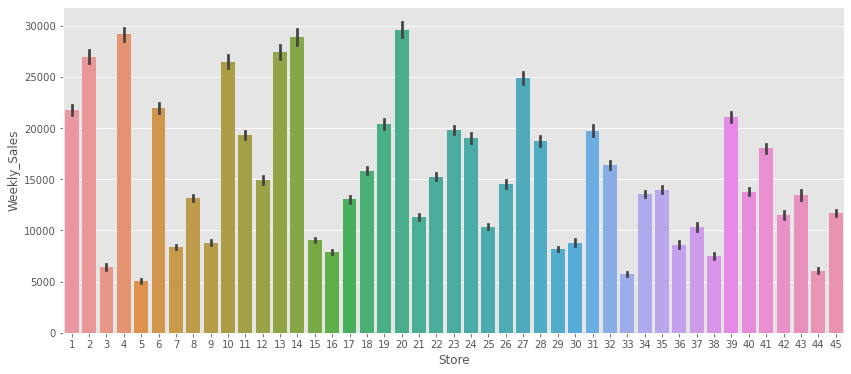

In [23]:
 plt.figure(figsize=(14,6))
sns.barplot(x='Store', y='Weekly_Sales', data=walfare)

### Représentation graphique des Ventes hebdomadaires  en fonction des vacances 

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

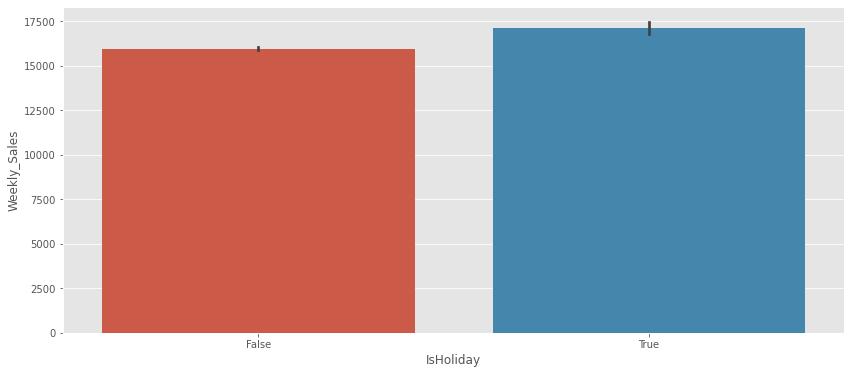

In [31]:
plt.figure(figsize=(14,6))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=walfare)

### Représentation graphique des Ventes hebdomadaires  par mois

<Figure size 432x288 with 0 Axes>

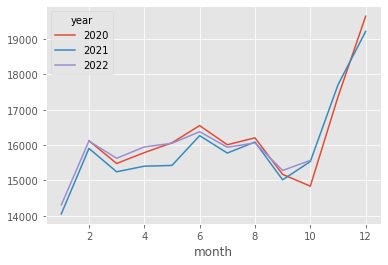

<Figure size 432x288 with 0 Axes>

In [32]:
monthly_sales = pd.pivot_table(walfare, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()
plt.figure()

L'observation des graphiques montre que 2011 a des ventes inférieures à 2010 en général. En regardant les ventes moyennes, nous voyons que 2010 a des valeurs plus élevées, mais 2012 n'a aucune information sur novembre et décembre qui ont des ventes plus élevées.Bien que 2012 n'ait pas de ventes au cours des deux derniers mois, la moyenne est proche de 2010. Très probablement, il prendra la première place si nous obtenons les résultats de 2012 et les additionnons.

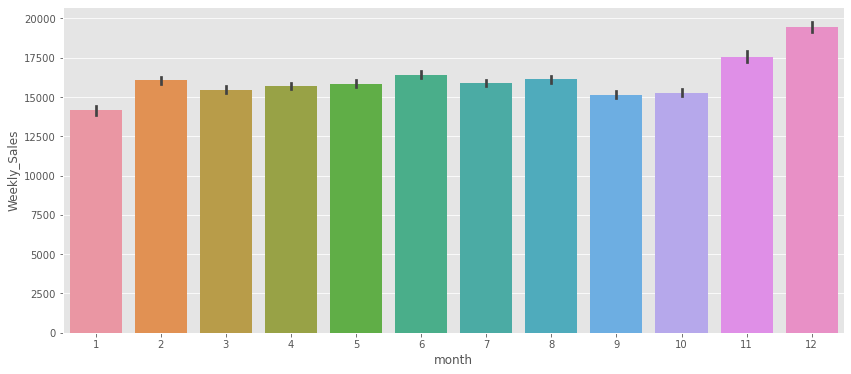

In [33]:
plt.figure(figsize=(14,6))
fig = sns.barplot(x='month', y='Weekly_Sales', data=walfare)

## PARTIE4 - CREATE TIME SERIES - Training a Prophet Time Series Model

In [34]:
frame = walfare.iloc[:,[2,3]]
frame.head(5)

,Date,Weekly_Sales
0,05/02/2020,24924.50
1,05/02/2020,50605.27
2,05/02/2020,13740.12
3,05/02/2020,39954.04
4,05/02/2020,32229.38


Change columns names for Prophet 

In [35]:
frame.columns=['ds','y']
frame.head()

,ds,y
0,05/02/2020,24924.50
1,05/02/2020,50605.27
2,05/02/2020,13740.12
3,05/02/2020,39954.04
4,05/02/2020,32229.38


In [36]:
frame['ds'] = pd.to_datetime(frame['ds'])
frame.head()

C:\Users\dell\AppData\Local\Temp/ipykernel_9800/952704733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ds'] = pd.to_datetime(frame['ds'])


,ds,y
0,2020-05-02,24924.50
1,2020-05-02,50605.27
2,2020-05-02,13740.12
3,2020-05-02,39954.04
4,2020-05-02,32229.38


Représdntation graphique de la série de vente 

<AxesSubplot:xlabel='ds'>

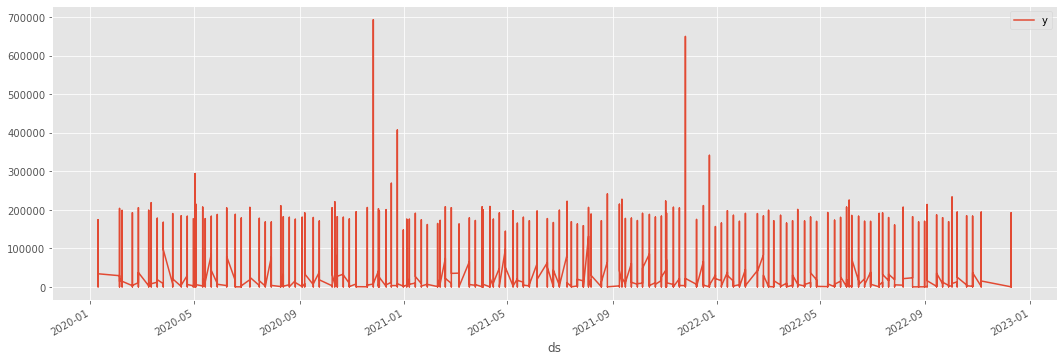

In [115]:
frame.plot(x='ds', y='y', figsize=(18,6))

Dans nos données, il y a beaucoup de mêmes valeurs de données. Nous les rassemblerons donc par semaine.

Train Test split 

In [65]:
train = frame.iloc[: len(frame)-365]
test = frame.iloc[len(frame)-365]

Start Making Prediction 

In [28]:
from prophet import Prophet 

Pour commencer, nous devons instancier un nouvel objet Prophet. Prophet nous permet de spécifier un certain nombre d'arguments. Par exemple, nous pouvons spécifier la plage souhaitée de notre intervalle d'incertitude en définissant le paramètre interval_width.

In [56]:
m = Prophet (interval_width = 0.95)

Maintenant que notre modèle Prophet a été initialisé, nous pouvons appeler sa méthode fit avec notre DataFrame en entrée.

In [57]:
training_run = m.fit(frame)

23:30:31 - cmdstanpy - INFO - Chain [1] start processing
23:31:22 - cmdstanpy - INFO - Chain [1] done processing


Pour obtenir des prévisions de nos séries chronologiques, nous devons fournir à Prophet un nouveau DataFrame contenant une colonne ds contenant les dates pour lesquelles nous voulons des prévisions.

De manière pratique, nous n'avons pas à nous préoccuper de la création manuelle de ce DataFrame, car Prophet fournit la fonction d'assistance make_future_dataframe.

## PARTIE5 : Making Predictions and evaluating Performance

In [118]:
future = m.make_future_dataframe(periods = 20, freq='D')
future.head(3)

,ds
0,2020-01-10
1,2020-02-04
2,2020-02-07


Dans l'extrait de code ci-dessus, nous avons demandé à Prophet de générer 200 horodatages à l'avenir.

Parce que nous travaillons avec des données journalières, nous avons clairement spécifié la fréquence souhaitée des horodatages 

Par conséquent, le make_future_dataframe a généré 20 horodatages journaliers pour nous.

En d'autres termes, nous cherchons à prédire les valeurs futures de notre série chronologique 3 ans dans le futur.

Le DataFrame des dates futures est ensuite utilisé comme entrée dans la méthode de prédiction de notre modèle ajusté.

In [162]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
158,2022-12-26,4.436662e+11,4.434889e+11,4.438490e+11,4.434889e+11,4.438490e+11,0.0,0.0,0.0,0.0,0.0,0.0,4.436662e+11
159,2022-12-27,4.436892e+11,4.435103e+11,4.438742e+11,4.435103e+11,4.438742e+11,0.0,0.0,0.0,0.0,0.0,0.0,4.436892e+11
160,2022-12-28,4.437121e+11,4.435316e+11,4.438990e+11,4.435316e+11,4.438990e+11,0.0,0.0,0.0,0.0,0.0,0.0,4.437121e+11
161,2022-12-29,4.437350e+11,4.435524e+11,4.439241e+11,4.435524e+11,4.439241e+11,0.0,0.0,0.0,0.0,0.0,0.0,4.437350e+11
162,2022-12-30,4.437579e+11,4.435735e+11,4.439492e+11,4.435735e+11,4.439492e+11,0.0,0.0,0.0,0.0,0.0,0.0,4.437579e+11


Nous obtenons un DataFrame volumineux avec de nombreuses colonnes intéressantes, mais nous sous-divisons notre sortie aux colonnes les plus pertinentes pour les prévisions. Ceux-ci sont

ds : l'horodatage de la valeur prévue

yhat : la valeur prévue de notre métrique (en statistique, yhat est une notation traditionnellement utilisée pour représenter les valeurs prédites d'une valeur y)

yhat_lower : la borne inférieure de nos prévisions

yhat_upper : la borne supérieure de nos prévisions

In [164]:
forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
158,2022-12-26,4.436662e+11,4.434889e+11,4.438490e+11
159,2022-12-27,4.436892e+11,4.435103e+11,4.438742e+11
160,2022-12-28,4.437121e+11,4.435316e+11,4.438990e+11
161,2022-12-29,4.437350e+11,4.435524e+11,4.439241e+11
162,2022-12-30,4.437579e+11,4.435735e+11,4.439492e+11


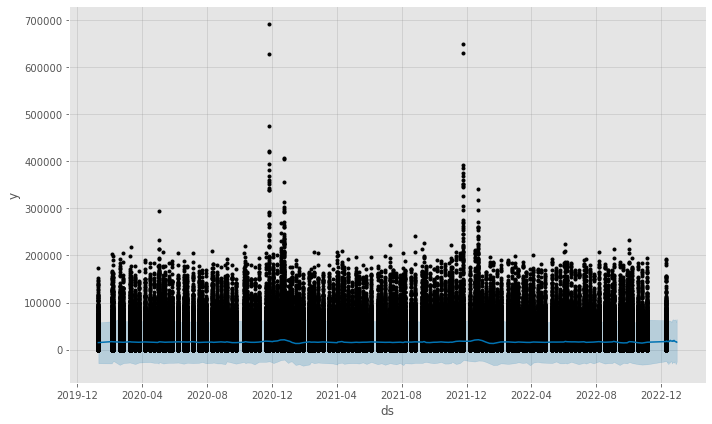

In [120]:
plotl = m.plot(forecast,  uncertainty=True)

Prophet, ici trace les valeurs observées de nos séries chronologiques (les points noirs), les valeurs prévues (ligne bleue) et les intervalles d'incertitude de nos prévisions (les régions ombrées en bleu).

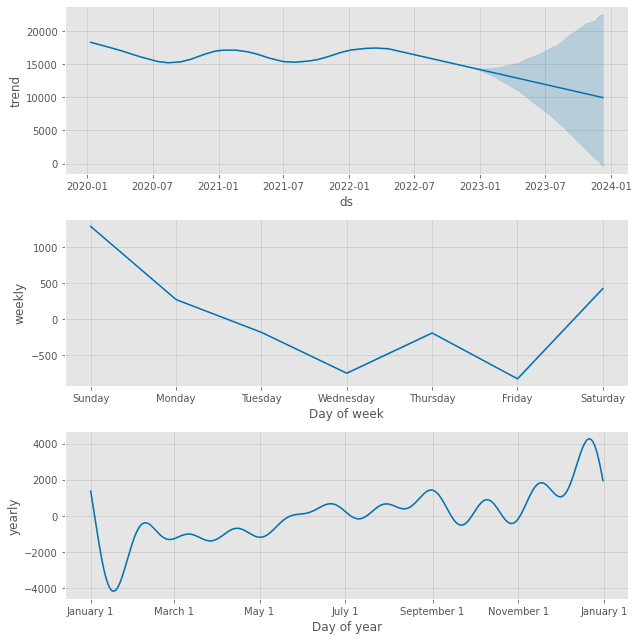

In [77]:
plot2 = m.plot_components(forecast)

Le premier graphique montre que la vente hebdomadaire des produits de NOZ augmente diminue jusqu'en 2023 prend une tendance baissière à partir de Janvier 2023.

Le deuxième graphique met en évidence le fait que le volume de vente  diminue jusqu'au mercredi et augmente du mercredi au jeudi puis diminue encore jusqu'au vendredi et augmente le samedi. en conclusion, les ventes sont plus fortes les vendredis. 

Le troisième graphique montre que le plus de trafic se produit pendant les mois de vacances de juillet et septembre et les mois de février et décembre.

In [121]:
lines = walfare['Store'].unique()
lines

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [124]:
wal = walfare.iloc[:,[0,2,3]]
wal.head(5)

,Store,Weekly_Sales,IsHoliday
Date,,,
2020-05-02,1,24924.50,False
2020-05-02,1,50605.27,False
2020-05-02,1,13740.12,False
2020-05-02,1,39954.04,False
2020-05-02,1,32229.38,False


In [125]:
for stock_line in lines : 
    frame =walfare[walfare['Store']== stock_line].copy()
    print (frame.tail())

            Store  Dept  Weekly_Sales  IsHoliday  week  month  year
Date                                                               
2022-10-26      1    94      60278.73      False    43     10  2022
2022-10-26      1    95     117375.38      False    43     10  2022
2022-10-26      1    96      36851.92      False    43     10  2022
2022-10-26      1    97      32830.52      False    43     10  2022
2022-10-26      1    98      12702.86      False    43     10  2022
            Store  Dept  Weekly_Sales  IsHoliday  week  month  year
Date                                                               
2022-10-26      2    94      71138.52      False    43     10  2022
2022-10-26      2    95     138018.99      False    43     10  2022
2022-10-26      2    96      38391.46      False    43     10  2022
2022-10-26      2    97      40710.09      False    43     10  2022
2022-10-26      2    98      14233.43      False    43     10  2022
            Store  Dept  Weekly_Sales  IsHoliday

            Store  Dept  Weekly_Sales  IsHoliday  week  month  year
Date                                                               
2022-10-26     29    93       1350.64      False    43     10  2022
2022-10-26     29    94          5.88      False    43     10  2022
2022-10-26     29    95      33247.02      False    43     10  2022
2022-10-26     29    97       2248.38      False    43     10  2022
2022-10-26     29    98        335.97      False    43     10  2022
            Store  Dept  Weekly_Sales  IsHoliday  week  month  year
Date                                                               
2022-10-26     30    94      25389.19      False    43     10  2022
2022-10-26     30    95      44954.61      False    43     10  2022
2022-10-26     30    96      19227.70      False    43     10  2022
2022-10-26     30    97      12765.38      False    43     10  2022
2022-10-26     30    98       3881.60      False    43     10  2022
            Store  Dept  Weekly_Sales  IsHoliday

In [126]:
fit_models ={}
for stock_line in lines:
    frame =wal[wal['Store']== stock_line].copy()
    frame.drop('Store', axis=1, inplace=True)
    frame.columns = ['ds', 'y']
    
    m = Prophet (interval_width = 0.95)
    model = m.fit(frame)
    fit_models[stock_line] = m

02:11:30 - cmdstanpy - INFO - Chain [1] start processing
02:11:30 - cmdstanpy - INFO - Chain [1] done processing
02:11:31 - cmdstanpy - INFO - Chain [1] start processing
02:11:31 - cmdstanpy - INFO - Chain [1] done processing
02:11:32 - cmdstanpy - INFO - Chain [1] start processing
02:11:32 - cmdstanpy - INFO - Chain [1] done processing
02:11:32 - cmdstanpy - INFO - Chain [1] start processing
02:11:33 - cmdstanpy - INFO - Chain [1] done processing
02:11:33 - cmdstanpy - INFO - Chain [1] start processing
02:11:33 - cmdstanpy - INFO - Chain [1] done processing
02:11:34 - cmdstanpy - INFO - Chain [1] start processing
02:11:34 - cmdstanpy - INFO - Chain [1] done processing
02:11:35 - cmdstanpy - INFO - Chain [1] start processing
02:11:36 - cmdstanpy - INFO - Chain [1] done processing
02:11:36 - cmdstanpy - INFO - Chain [1] start processing
02:11:37 - cmdstanpy - INFO - Chain [1] done processing
02:11:37 - cmdstanpy - INFO - Chain [1] start processing
02:11:38 - cmdstanpy - INFO - Chain [1]

In [133]:
forward = fit_models[1].make_future_dataframe(20)
forecast = fit_models[1].predict(forward)

In [134]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00.000000000,6.766850e-02,-3.898755e-01,5.785442e-01,6.766850e-02,6.766850e-02,0.0,0.0,0.0,0.0,0.0,0.0,6.766850e-02
1,1970-01-01 00:00:00.000000000,6.766850e-02,-4.202111e-01,5.616257e-01,6.766850e-02,6.766850e-02,0.0,0.0,0.0,0.0,0.0,0.0,6.766850e-02
2,1970-01-01 00:00:00.000000000,6.766850e-02,-4.321439e-01,5.805271e-01,6.766850e-02,6.766850e-02,0.0,0.0,0.0,0.0,0.0,0.0,6.766850e-02
3,1970-01-01 00:00:00.000000000,6.766850e-02,-4.255211e-01,5.342162e-01,6.766850e-02,6.766850e-02,0.0,0.0,0.0,0.0,0.0,0.0,6.766850e-02
4,1970-01-01 00:00:00.000000000,6.766850e-02,-4.282653e-01,5.433196e-01,6.766850e-02,6.766850e-02,0.0,0.0,0.0,0.0,0.0,0.0,6.766850e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043,1970-01-17 00:00:00.000203670,1.925994e+08,1.925749e+08,1.926272e+08,1.925749e+08,1.926272e+08,0.0,0.0,0.0,0.0,0.0,0.0,1.925994e+08
10044,1970-01-18 00:00:00.000203670,2.046368e+08,2.046100e+08,2.046667e+08,2.046100e+08,2.046667e+08,0.0,0.0,0.0,0.0,0.0,0.0,2.046368e+08
10045,1970-01-19 00:00:00.000203670,2.166743e+08,2.166448e+08,2.167068e+08,2.166448e+08,2.167068e+08,0.0,0.0,0.0,0.0,0.0,0.0,2.166743e+08
10046,1970-01-20 00:00:00.000203670,2.287118e+08,2.286796e+08,2.287471e+08,2.286796e+08,2.287471e+08,0.0,0.0,0.0,0.0,0.0,0.0,2.287118e+08


### Plotting the forecasted components 

Nous pouvons tracer la tendance et la saisonnalité, composantes de la prévision comme suit :

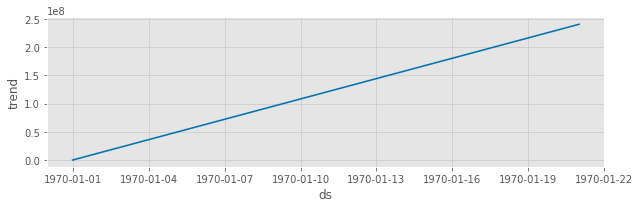

In [135]:
fig1 = m.plot_components(forecast)

### EVALUATION DU MODEL 

In [166]:
from statsmodels.tools.eval_measures import rmse

In [167]:
predictions = forecast.iloc[-365 :]['yhat']

In [168]:
print("racine moyenne quadratique Erreur entre les valeurs réelles et prédites", rmse (predictions, test['y']))
print ("Mean Value of Test Dataset:", test['y'].mean())

racine moyenne quadratique Erreur entre les valeurs réelles et prédites 432525042551.39014
Mean Value of Test Dataset: 58339.44


### Conclusion 